In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import math
from scipy.optimize import curve_fit
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100

In [8]:
signals = pd.read_csv("data/train/wind-farm-1-signals-training.csv", sep=";")
signals = signals[["Turbine_ID", "Timestamp", "Grd_Prod_Pwr_Avg", "Amb_WindSpeed_Avg", "Amb_Temp_Avg", "Nac_Temp_Avg", "Rtr_RPM_Avg", "Gear_Bear_Temp_Avg", "Gen_RPM_Avg", "Gen_Bear2_Temp_Avg", "Gen_Bear_Temp_Avg"]]
signals["Timestamp_Datetime"] = pd.to_datetime(signals.Timestamp)
signals.Timestamp_Datetime = signals.Timestamp_Datetime.apply(lambda dt: datetime.datetime(dt.year, dt.month, dt.day, dt.hour, dt.minute, dt.second))
signals_T01 = signals.loc[signals.Turbine_ID == "T01"]
signals_T06 = signals.loc[signals.Turbine_ID == "T06"]
signals_T07 = signals.loc[signals.Turbine_ID == "T07"]
signals_T09 = signals.loc[signals.Turbine_ID == "T09"]
signals_T11 = signals.loc[signals.Turbine_ID == "T11"]

In [3]:
failures = pd.read_csv("data/train/wind-farm-1-failures-training.csv", sep=';')
failures.Timestamp = pd.to_datetime(failures.Timestamp)
failures.Timestamp = failures.Timestamp.apply(lambda dt: datetime.datetime(dt.year, dt.month, dt.day, dt.hour, 10 * math.floor(dt.minute / 10), dt.second))


### Wykresy mocy i inne takie

Text(0.5, 1.0, 'Power curve for Turbine T01')

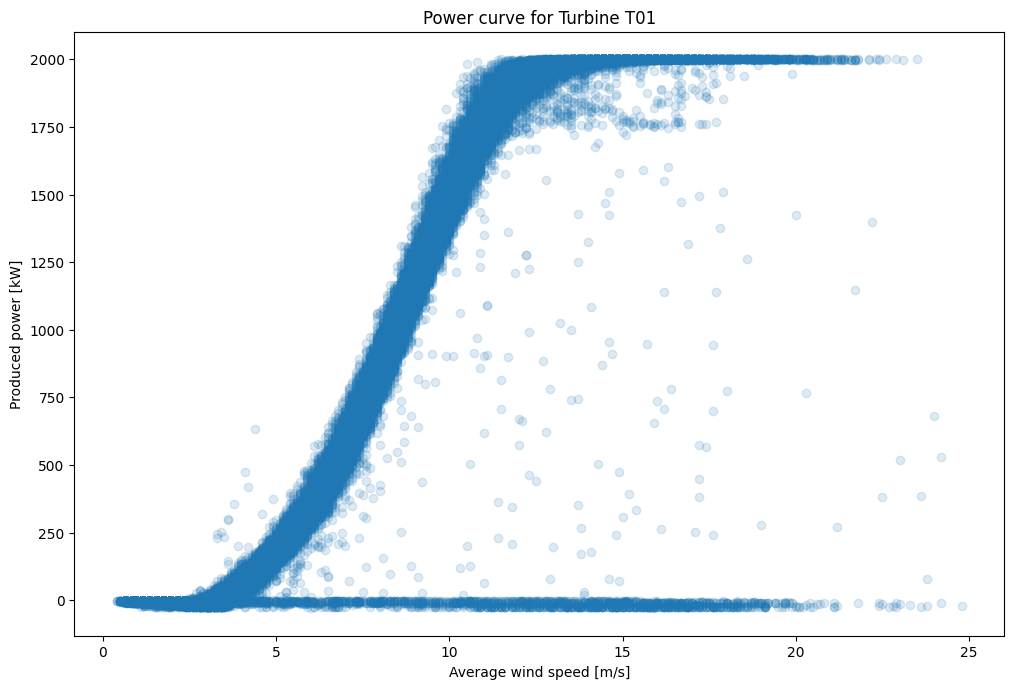

In [4]:
plt.scatter(signals_T01.Amb_WindSpeed_Avg, signals_T01.Grd_Prod_Pwr_Avg, alpha=0.15)
plt.xlabel("Average wind speed [m/s]")
plt.ylabel("Produced power [kW]")
plt.title("Power curve for Turbine T01")

Text(0.5, 1.0, 'Power curve for Turbine T06')

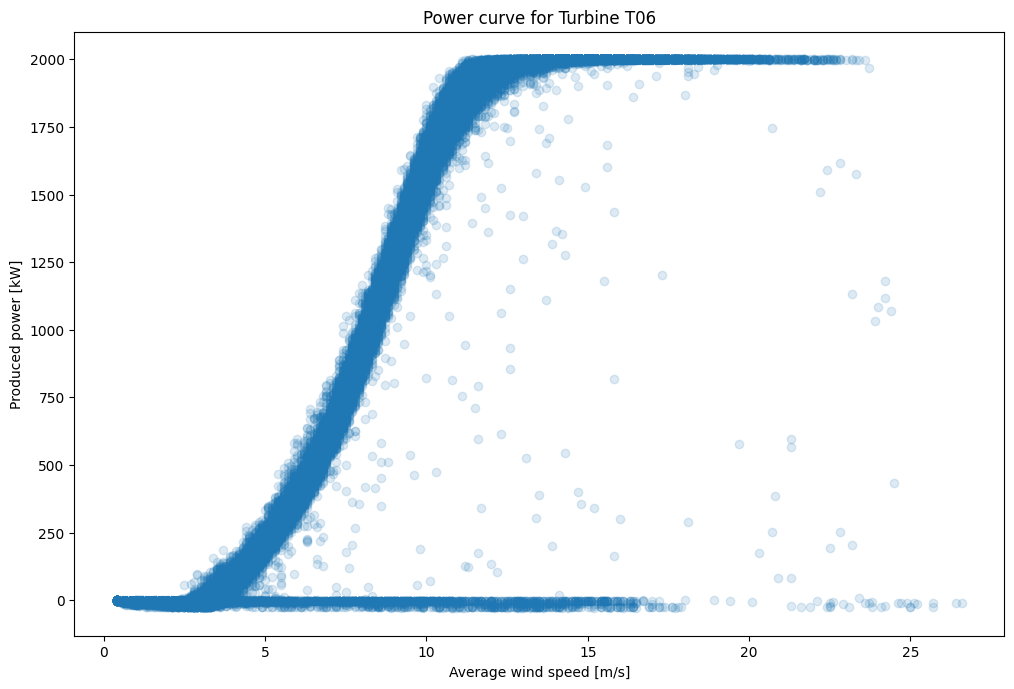

In [5]:
plt.scatter(signals_T06.Amb_WindSpeed_Avg, signals_T06.Grd_Prod_Pwr_Avg, alpha=0.15)
plt.xlabel("Average wind speed [m/s]")
plt.ylabel("Produced power [kW]")
plt.title("Power curve for Turbine T06")

Text(0.5, 1.0, 'Power curve for Turbine T07')

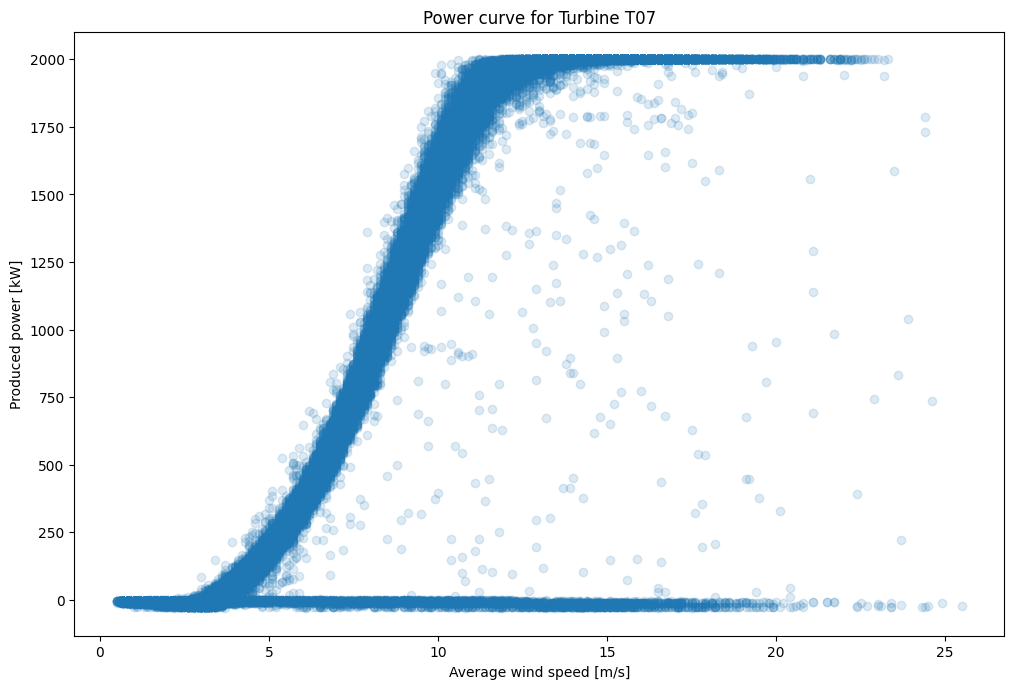

In [6]:
plt.scatter(signals_T07.Amb_WindSpeed_Avg, signals_T07.Grd_Prod_Pwr_Avg, alpha=0.15)
plt.xlabel("Average wind speed [m/s]")
plt.ylabel("Produced power [kW]")
plt.title("Power curve for Turbine T07")

Text(0.5, 1.0, 'Power curve for Turbine T09')

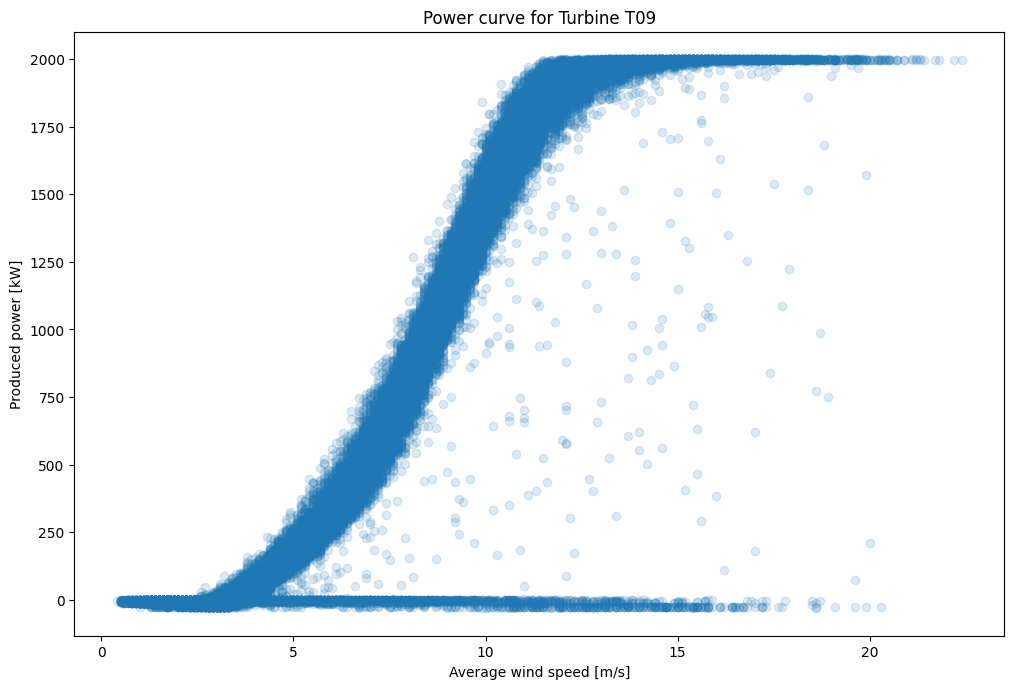

In [7]:
plt.scatter(signals_T09.Amb_WindSpeed_Avg, signals_T09.Grd_Prod_Pwr_Avg, alpha=0.15)
plt.xlabel("Average wind speed [m/s]")
plt.ylabel("Produced power [kW]")
plt.title("Power curve for Turbine T09")

Text(0.5, 1.0, 'Power curve for Turbine T11')

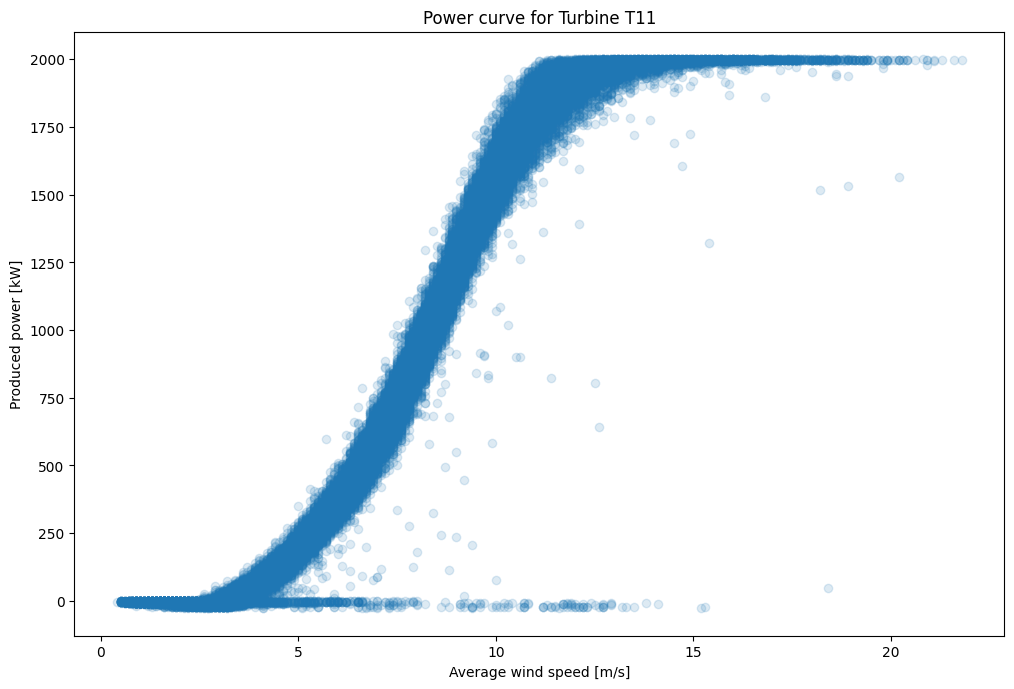

In [8]:
plt.scatter(signals_T11.Amb_WindSpeed_Avg, signals_T11.Grd_Prod_Pwr_Avg, alpha=0.15)
plt.xlabel("Average wind speed [m/s]")
plt.ylabel("Produced power [kW]")
plt.title("Power curve for Turbine T11")

In [18]:
def sigmoid_curve(x, L, x_0, k, b):
    return L / (1 + np.exp(-k * (x - x_0))) + b

In [29]:
def power_curve(x):
    return 1911.36823 / (1 + np.exp(-0.83735044 * (x - 8.3759024))) + 99.92345886

In [16]:
power_curve = pd.read_csv("data/Power_curve.csv")
x_data = power_curve.iloc[:, 0]
y_data = power_curve.iloc[:, 1]

In [22]:
init_state = [max(y_data), np.median(x_data), 1, min(y_data)]
popt, pcov = curve_fit(sigmoid_curve, x_data, y_data, method="dogbox")
popt

array([1.91136823e+03, 8.37590240e+00, 8.37235044e-01, 9.92345886e+01])

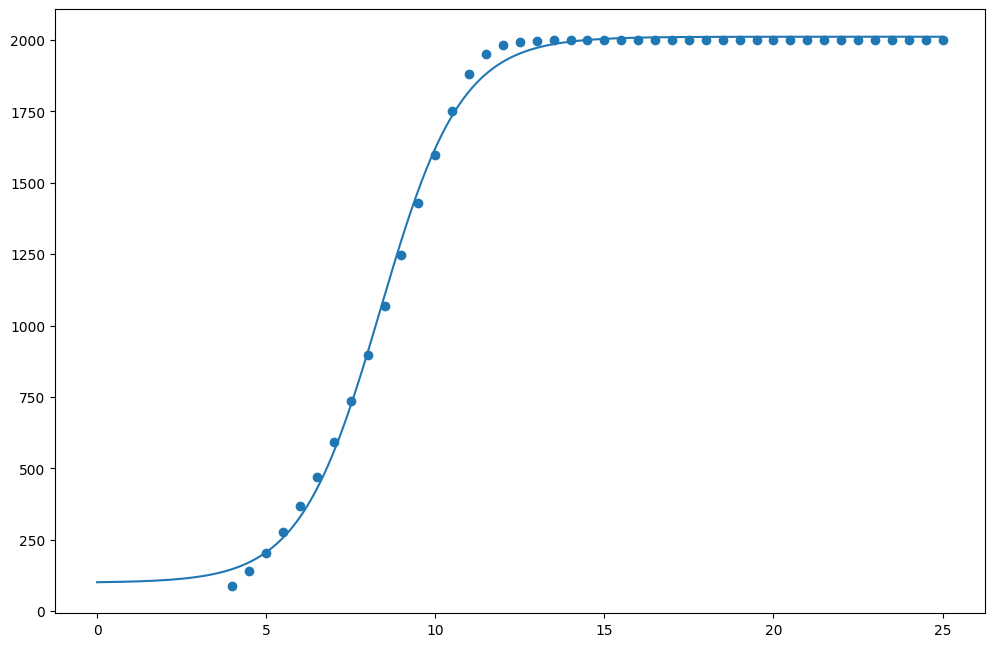

In [30]:
plt.scatter(x_data, y_data)
x = np.linspace(0, 25, 1000)
y = power_curve(x)
plt.plot(x, y)

In [21]:
popt

array([1.91136823e+03, 8.37590240e+00, 8.37235044e-01, 9.92345886e+01])

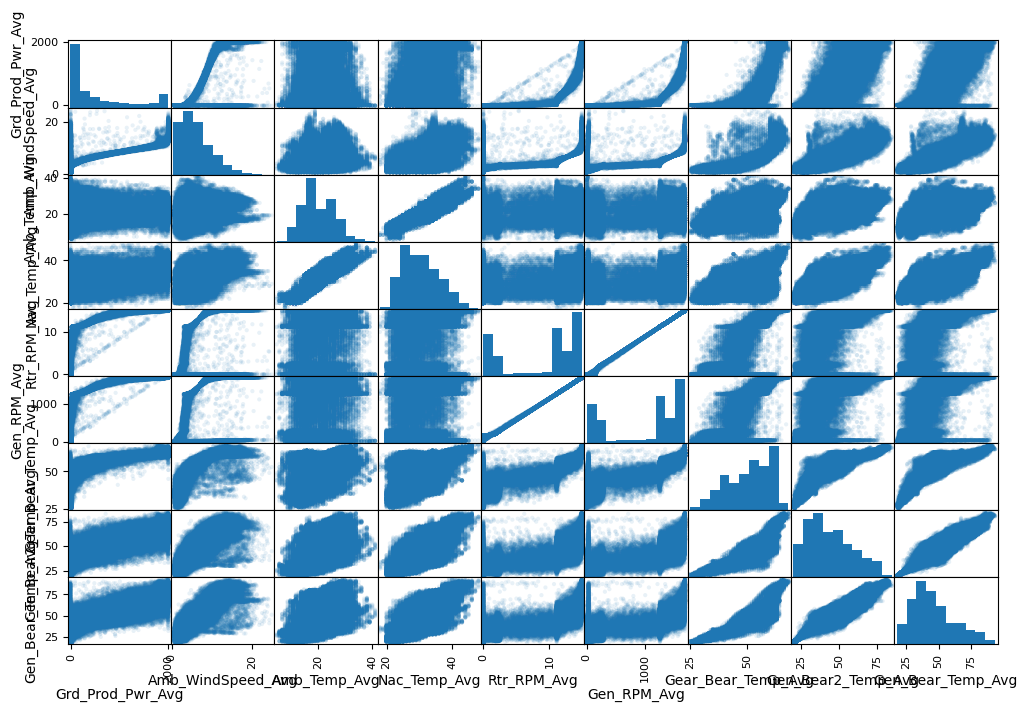

In [8]:
attributes = ["Grd_Prod_Pwr_Avg", "Amb_WindSpeed_Avg", "Amb_Temp_Avg", "Nac_Temp_Avg", "Rtr_RPM_Avg", "Gen_RPM_Avg", "Gear_Bear_Temp_Avg", "Gen_Bear2_Temp_Avg", "Gen_Bear_Temp_Avg"]
pd.plotting.scatter_matrix(signals_T01[attributes], figsize=(12, 8), alpha=0.1)
plt.show()

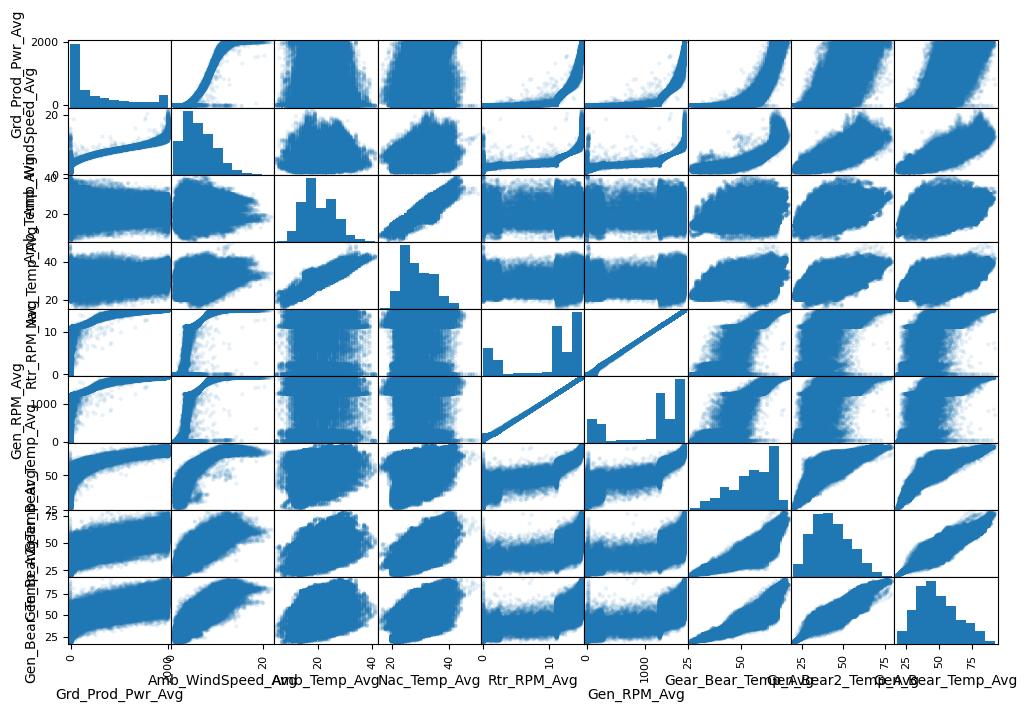

In [7]:
attributes = ["Grd_Prod_Pwr_Avg", "Amb_WindSpeed_Avg", "Amb_Temp_Avg", "Nac_Temp_Avg", "Rtr_RPM_Avg", "Gen_RPM_Avg", "Gear_Bear_Temp_Avg", "Gen_Bear2_Temp_Avg", "Gen_Bear_Temp_Avg"]
pd.plotting.scatter_matrix(signals_T11[attributes], figsize=(12, 8), alpha=0.1)
plt.show()

### Analiza zachowania krzywej mocy podczas awarii

In [98]:
failures

,Turbine_ID,Component,Timestamp,Remarks
0,T11,GENERATOR,2016-03-03 19:00:00,Electric circuit error in generator
1,T06,HYDRAULIC_GROUP,2016-04-04 18:50:00,Error in pitch regulation
2,T07,GENERATOR_BEARING,2016-04-30 12:40:00,High temperature in generator bearing (replace...
3,T09,GENERATOR_BEARING,2016-06-07 16:50:00,High tempemperature generator bearing
4,T07,TRANSFORMER,2016-07-10 03:40:00,High temperature transformer
5,T06,GENERATOR,2016-07-11 19:40:00,Generator replaced
6,T01,GEARBOX,2016-07-18 02:10:00,Gearbox pump damaged
7,T06,GENERATOR,2016-07-24 17:00:00,Generator temperature sensor failure
8,T09,GENERATOR_BEARING,2016-08-22 18:20:00,High temperature generator bearing
9,T07,TRANSFORMER,2016-08-23 02:20:00,High temperature transformer. Transformer refr...


W przypadku pierwszej awarii turbiny jedenastej nie ma danych z tej konkretnej godziny...

In [103]:
signals_T11.loc[signals_T11.Timestamp_Datetime >= datetime.datetime(2016, 3, 3, 18, 30, 0), ]

,Turbine_ID,Timestamp,Grd_Prod_Pwr_Avg,Amb_WindSpeed_Avg,Amb_Temp_Avg,Nac_Temp_Avg,Rtr_RPM_Avg,Gear_Bear_Temp_Avg,Gen_RPM_Avg,Gen_Bear2_Temp_Avg,Gen_Bear_Temp_Avg,Timestamp_Datetime
45177,T11,2016-03-03T18:30:00+00:00,-2.6,2.9,14,24,0.0,30,0.0,26,26.0,2016-03-03 18:30:00
45180,T11,2016-03-03T18:40:00+00:00,-6.6,3.1,14,23,0.9,30,105.4,26,26.0,2016-03-03 18:40:00
45183,T11,2016-03-03T18:50:00+00:00,-3.7,3.5,13,24,0.0,30,7.1,26,26.0,2016-03-03 18:50:00
45194,T11,2016-03-03T19:10:00+00:00,-5.4,2.4,13,24,0.4,32,79.9,28,26.0,2016-03-03 19:10:00
45198,T11,2016-03-03T19:20:00+00:00,-3.9,3.1,13,24,7.6,35,861.4,29,26.0,2016-03-03 19:20:00
...,...,...,...,...,...,...,...,...,...,...,...,...
434122,T11,2017-08-31T23:20:00+00:00,303.8,5.9,26,31,11.4,57,1286.1,42,43.0,2017-08-31 23:20:00
434126,T11,2017-08-31T23:30:00+00:00,149.6,5.0,26,31,11.1,56,1249.8,42,43.0,2017-08-31 23:30:00
434132,T11,2017-08-31T23:40:00+00:00,82.6,4.3,26,31,11.1,55,1248.8,43,44.0,2017-08-31 23:40:00
434135,T11,2017-08-31T23:50:00+00:00,130.6,4.8,26,31,11.1,55,1250.5,43,45.0,2017-08-31 23:50:00


In [39]:
signals_and_fails = signals.merge(failures, left_on=["Turbine_ID", "Timestamp_Datetime"], right_on=["Turbine_ID", "Timestamp"], how="inner")

In [31]:
signals_T01["Pwr_Std"] = signals_T01.Grd_Prod_Pwr_Avg - power_curve(signals_T01.Amb_WindSpeed_Avg)

<ipython-input-31-78841b1d938b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  signals_T01["Pwr_Std"] = signals_T01.Grd_Prod_Pwr_Avg - power_curve(signals_T01.Amb_WindSpeed_Avg)


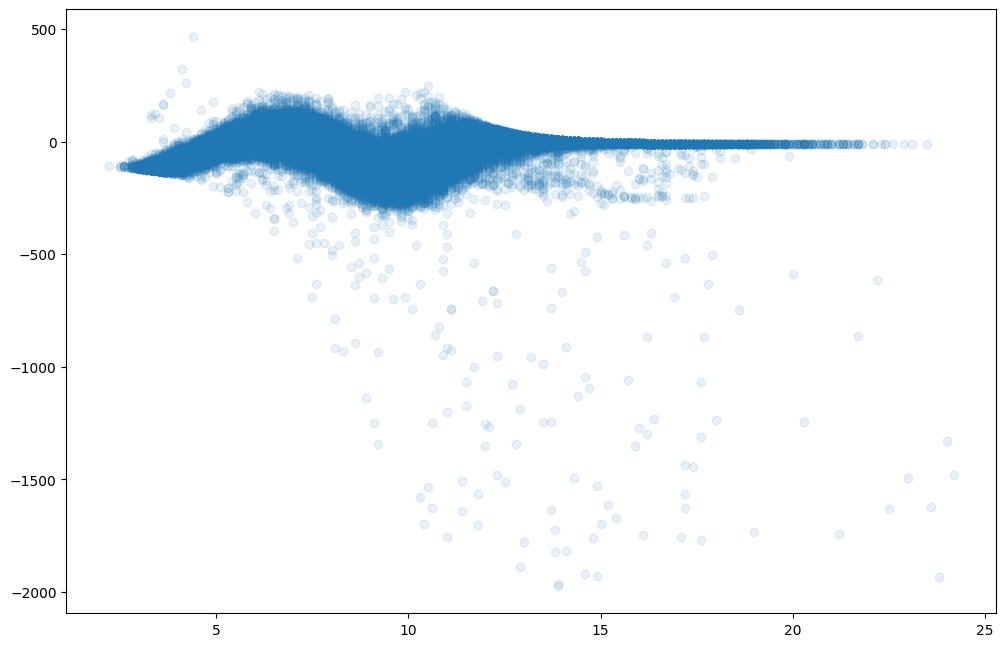

In [36]:

plt.scatter(signals_T01.loc[signals_T01.Grd_Prod_Pwr_Avg > 0, :].Amb_WindSpeed_Avg, signals_T01.loc[signals_T01.Grd_Prod_Pwr_Avg > 0, :].Pwr_Std, alpha=0.1)

In [43]:
fail_times = signals_and_fails.loc[signals_and_fails.Turbine_ID == "T01", "Timestamp_x"]
fail_times

4     2016-07-18T02:10:00+00:00
17    2017-08-11T13:10:00+00:00
Name: Timestamp_x, dtype: object

# Czyszczenie danych

Z każdego zbioru danych (dla turbin) chcemy usunąć te rekordy, które albo posiadają ujemnie generowany prąd albo tworzą ogon pod sigmoidą, ze względu na to, że są to dane trudne w interpretacji. Prawdopodobnie biorą się stąd, że przy mocnych podmuchach wiatru turbiny nie pracują lub potrzebują trochę czasu, aby ustawić się twarzą do wiatru i zacząć generować maksymalną moc.

Dane czyścimy w krokach:
- usunięcie rekordów o ujemnym generowanym prądzie
- usunięcie rekordów o niedodatnim prądzie, które leżą pod sigmoidą tworząc ogon

In [11]:
def maintain_positive(turbine):
    return turbine.loc[turbine["Grd_Prod_Pwr_Avg"] > 0, :]

signals_T01 = maintain_positive(signals_T01)
signals_T06 = maintain_positive(signals_T06)
signals_T07 = maintain_positive(signals_T07)
signals_T09 = maintain_positive(signals_T09)
signals_T11 = maintain_positive(signals_T11)

In [13]:
def power_curve(x):
    return 1911.36823 / (1 + np.exp(-0.83735044 * (x - 8.3759024))) + 99.92345886

Text(0.5, 1.0, 'Power curve for Turbine T11')

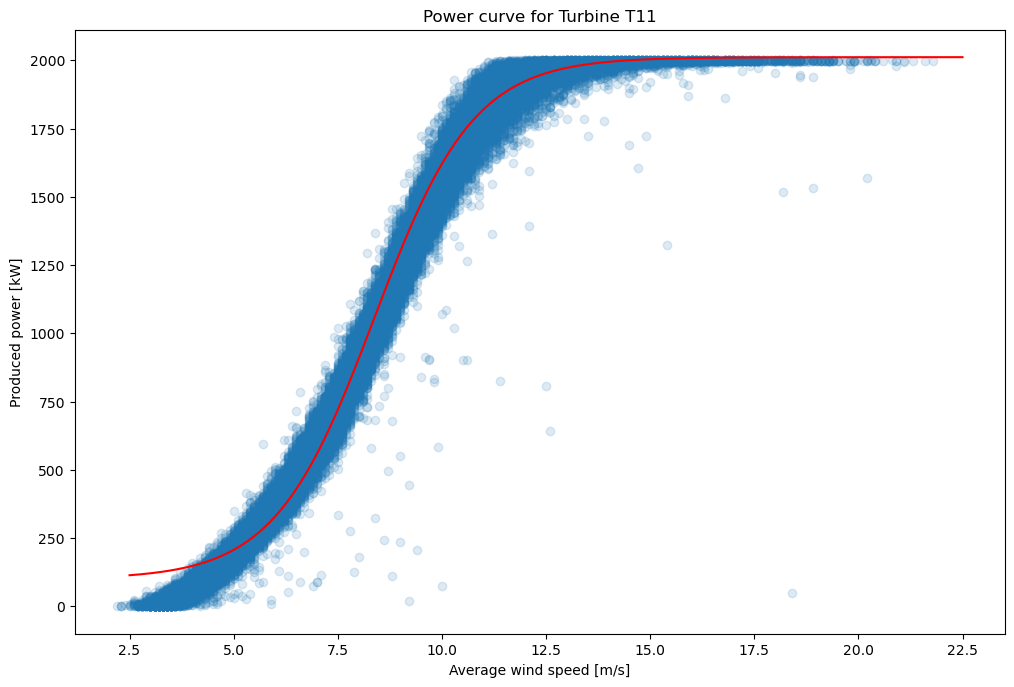

In [15]:
plt.scatter(signals_T11.Amb_WindSpeed_Avg, signals_T11.Grd_Prod_Pwr_Avg, alpha=0.15)
plt.plot(np.linspace(2.5, 22.5, 1000), power_curve(np.linspace(2.5, 22.5, 1000)), color="red")
plt.xlabel("Average wind speed [m/s]")
plt.ylabel("Produced power [kW]")
plt.title("Power curve for Turbine T11")

Usunięcie rekordów o niedodatnim prądzie okazało się wystarczające. Widać jednak, że wiatraki przy małych podmuchach wiatru nie generują prądu pasującego do krzywej teoretycznej.

## Nałożenie na dane momentów awarii

W tym kroku dodajemy kolumnę 'failure' do danych dla każdej turbiny. W zależności od dobranego parametru będzie ona obejmowała $p$-timestampów wstecz, przed awarią. Wartości w tej kolumnie będą się zmniejszały od $p$-tego rekordu aż do $1$ w rekordzie, w którym wystąpiła awaria. Jeżeli w danym momencie nie było awarii, ani nie poprzedzał on żadnej, to wartości ustawiamy na zero.

Zbiór 'failures' został uprzednio przekształcony. Kolumna 'Timestamp' zawierała dokładną godzinę wystąpienia awarii (co do minuty). Wartości te zaokrąglamy w dół z dokładnością do 10 minut, aby pokrywały się z danymi z turbin.

In [151]:
def mark_failures(turbine, p=4):
    turbineID = turbine.iloc[0, 0]
    times = failures.loc[failures.Turbine_ID == turbineID, "Timestamp"]
    turbine["Failure"] = np.zeros(len(turbine), dtype=int)
    for t in times:
        index = np.array(turbine.Timestamp_Datetime <= t)
        # Zastawiamy jedynie ostanie 'p' wartości True
        failures_index = np.where(index)[0][-p:]
        index = np.array([False] * len(index))
        index[failures_index] = True
        turbine.loc[index, "Failure"] = np.linspace(p, 1, num=p, endpoint=True, dtype=int)

In [152]:
mark_failures(signals_T01)
mark_failures(signals_T06)
mark_failures(signals_T07)
mark_failures(signals_T09)
mark_failures(signals_T11)

Teraz możemy użyć danych, aby pokolorować odpowiednio wykresy.

In [112]:
import seaborn as sns

In [166]:
def power_curve_with_fails(turbine):
    no_fails = (turbine.Failure == 0)
    fails = (turbine.Failure != 0)
    ax = sns.scatterplot(data=turbine.loc[no_fails, :], x="Amb_WindSpeed_Avg", y="Grd_Prod_Pwr_Avg", color="lightblue", alpha = 0.21, linewidth=0)
    sns.scatterplot(data=turbine.loc[fails, :], x="Amb_WindSpeed_Avg", y="Grd_Prod_Pwr_Avg", hue="Failure", ax=ax, 
                    palette="mako", linewidth=0, alpha=0.75)

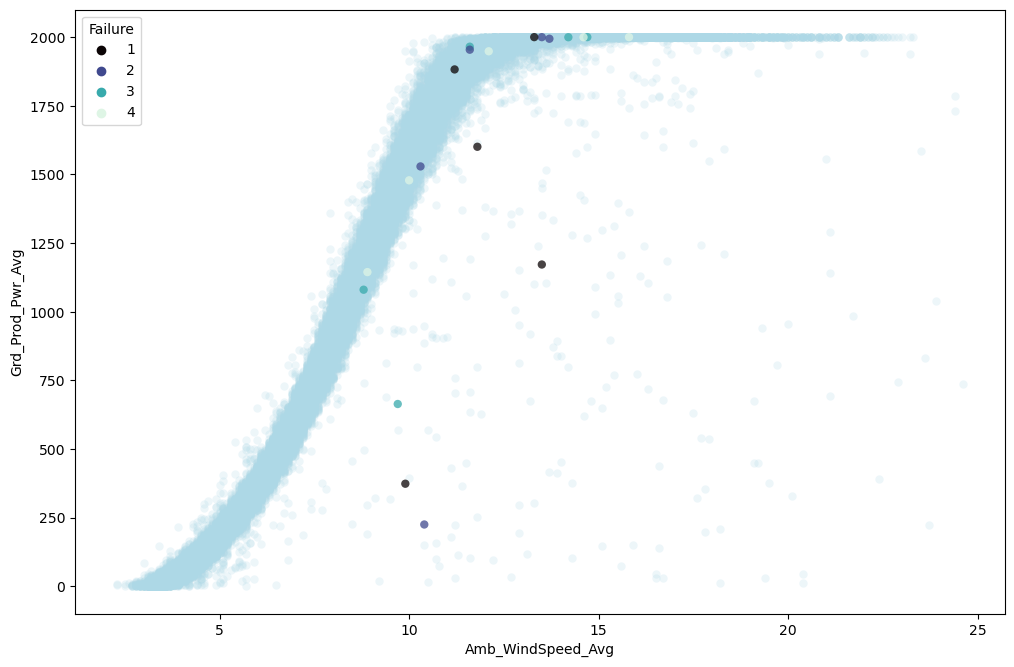

In [168]:
power_curve_with_fails(signals_T07)

In [174]:
failures.loc[failures.Turbine_ID == "T06"]

,Turbine_ID,Component,Timestamp,Remarks
1,T06,HYDRAULIC_GROUP,2016-04-04 18:50:00,Error in pitch regulation
5,T06,GENERATOR,2016-07-11 19:40:00,Generator replaced
7,T06,GENERATOR,2016-07-24 17:00:00,Generator temperature sensor failure
10,T06,GENERATOR,2016-09-04 08:00:00,High temperature generator error
11,T06,GENERATOR,2016-10-02 17:00:00,Refrigeration system and temperature sensors i...
15,T06,GENERATOR,2016-10-27 16:20:00,Generator replaced
20,T06,HYDRAULIC_GROUP,2017-08-19 09:40:00,Oil leakage in Hub


In [175]:
failures.loc[failures.Turbine_ID == "T11"]

,Turbine_ID,Component,Timestamp,Remarks
0,T11,GENERATOR,2016-03-03 19:00:00,Electric circuit error in generator
14,T11,HYDRAULIC_GROUP,2016-10-17 17:40:00,Hydraulic group error in the brake circuit
17,T11,HYDRAULIC_GROUP,2017-04-26 18:00:00,Hydraulic group error in the brake circuit


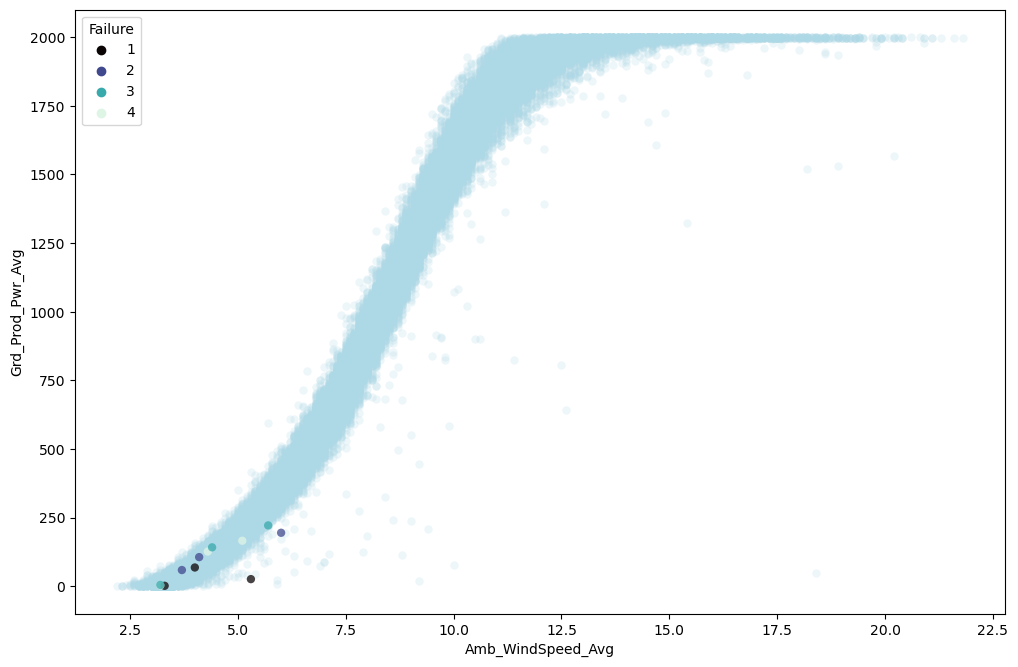

In [177]:
power_curve_with_fails(signals_T11)

In [178]:
signals_T01.loc[signals_T01.Failure > 0]

,Turbine_ID,Timestamp,Grd_Prod_Pwr_Avg,Amb_WindSpeed_Avg,Amb_Temp_Avg,Nac_Temp_Avg,Rtr_RPM_Avg,Gear_Bear_Temp_Avg,Gen_RPM_Avg,Gen_Bear2_Temp_Avg,Gen_Bear_Temp_Avg,Timestamp_Datetime,Failure
142052,T01,2016-07-18T01:40:00+00:00,62.3,11.0,24,31,1.4,45,185.8,31,34.0,2016-07-18 01:40:00,4
142057,T01,2016-07-18T01:50:00+00:00,1920.3,11.3,24,32,14.8,53,1673.6,33,34.0,2016-07-18 01:50:00,3
142060,T01,2016-07-18T02:00:00+00:00,1991.3,12.3,24,31,14.9,58,1681.0,41,37.0,2016-07-18 02:00:00,2
142065,T01,2016-07-18T02:10:00+00:00,441.6,12.5,24,32,3.6,58,417.1,45,41.0,2016-07-18 02:10:00,1
419480,T01,2017-08-11T12:40:00+00:00,1991.3,14.2,28,42,14.9,65,1681.0,77,84.0,2017-08-11 12:40:00,4
419485,T01,2017-08-11T12:50:00+00:00,1999.8,16.2,28,43,14.9,65,1681.7,78,85.0,2017-08-11 12:50:00,3
419491,T01,2017-08-11T13:00:00+00:00,1997.6,15.1,28,42,14.9,65,1682.1,78,85.0,2017-08-11 13:00:00,2
419496,T01,2017-08-11T13:10:00+00:00,1999.8,16.4,28,42,14.9,65,1681.3,78,85.0,2017-08-11 13:10:00,1
